In [52]:
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
dfhomicidios=pd.read_csv('Datasets\homicidios.csv')

In [54]:
dfhomicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             715 non-null    object 
 1   Rol                            705 non-null    object 
 2   Víctima                        707 non-null    object 
 3   Sexo                           711 non-null    object 
 4   Edad                           664 non-null    float64
 5   Días_de_muerte_post_accidente  649 non-null    float64
 6   No_víctimas                    715 non-null    float64
 7   Fecha                          715 non-null    object 
 8   Hora_formato                   714 non-null    object 
 9   Hora                           714 non-null    float64
 10  Tipo_de_calle                  715 non-null    object 
 11  Calle                          715 non-null    object 
 12  Comuna                         715 non-null    flo

In [55]:
dfhomicidios.Fecha=pd.to_datetime(dfhomicidios.Fecha)

# KPI #1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Según el útlimo censo, la población de Buenos Aires para el año 2022 fue de 3,120,612 personas, al no haber datosdel año 2021, se toma este año como referencia.

In [56]:
#creamos una tablas nueva para hacer el kpi, primero hacemos una columna donde indique si es el primer semestre o el segundo
dfhomicidios['semestre']=dfhomicidios.Fecha.dt.month.apply(lambda x: 1 if x<=6 else 2)
#agrupamos las victimas por año y semestre
kpi1=dfhomicidios.groupby([dfhomicidios.Fecha.dt.year,'semestre'])['No_víctimas'].count().reset_index()
#hacemos una columna con la tasa por semestre por año
kpi1['tasa']=(kpi1['No_víctimas']/3120612)*100000
#hacemos otra columa donde traemos el dato del semestre anterior
kpi1['semestre_anterior']=kpi1['tasa'].shift(1)
# creamos una columa dode indique cual es la diferencia entre un semestre y otro
kpi1['diferencia']=round((kpi1['tasa']/kpi1['semestre_anterior'])*100-100,2)
# se pone 0 e el primer año, ya que no hay datos para hacer comparación
kpi1.fillna(0,inplace=True)
#redondeamos la columna tasaa a dos decimales
kpi1.tasa=round(kpi1.tasa,2)
#redondeamos la columna semestre anterior
kpi1.semestre_anterior=round(kpi1.semestre_anterior,2)
kpi1.to_csv('Datasets/kpi1.csv',index=False)
kpi1

,Fecha,semestre,No_víctimas,tasa,semestre_anterior,diferencia
0,2016,1,65,2.08,0.00,0.00
1,2016,2,79,2.53,2.08,21.54
2,2017,1,69,2.21,2.53,-12.66
3,2017,2,71,2.28,2.21,2.90
4,2018,1,70,2.24,2.28,-1.41
5,2018,2,79,2.53,2.24,12.86
6,2019,1,57,1.83,2.53,-27.85
7,2019,2,47,1.51,1.83,-17.54
8,2020,1,31,0.99,1.51,-34.04
9,2020,2,50,1.60,0.99,61.29


In [57]:
kpi1=kpi1.set_index(['Fecha','semestre'])
kpi1['meta']=kpi1['semestre_anterior']*.90
kpi1

No_víctimas  tasa  semestre_anterior  diferencia   meta
Fecha semestre                                                         
2016  1                  65  2.08               0.00        0.00  0.000
      2                  79  2.53               2.08       21.54  1.872
2017  1                  69  2.21               2.53      -12.66  2.277
      2                  71  2.28               2.21        2.90  1.989
2018  1                  70  2.24               2.28       -1.41  2.052
      2                  79  2.53               2.24       12.86  2.016
2019  1                  57  1.83               2.53      -27.85  2.277
      2                  47  1.51               1.83      -17.54  1.647
2020  1                  31  0.99               1.51      -34.04  1.359
      2                  50  1.60               0.99       61.29  0.891
2021  1                  55  1.76               1.60       10.00  1.440
      2                  42  1.35               1.76      -23.64  1.584

### Aqui podemos ver graficado, donde vamos evaluando semestre por semestre la tasa y la meta de la tasa, donde solo en el primr semestre del año 2017, los dos semestres del año 2019, el primer semestre del 2020 y el segundo semestre del 2021 se cumlió el objetivo, que era reducir la tasa de homicidios de un semestre a otro en un 10% para la Ciudad de Buenos Aires

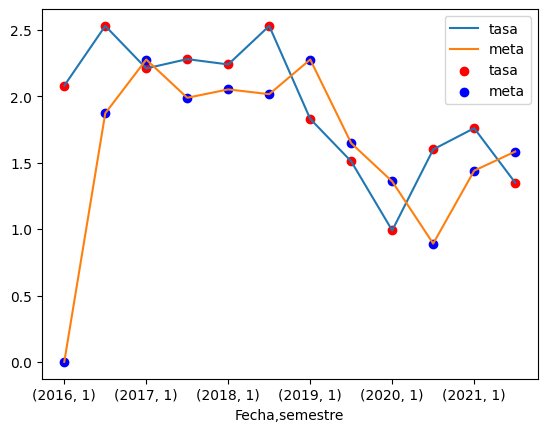

In [46]:
# Crear la gráfica de líneas
ax = kpi1[['tasa', 'meta']].plot()

# Poner puntos en las ubicaciones de los valores
ax.scatter(x=range(len(kpi1)), y=kpi1['tasa'], color='red', label='tasa', marker='o')
ax.scatter(x=range(len(kpi1)), y=kpi1['meta'], color='blue', label='meta', marker='o')

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

# KPI 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [64]:
kpi2=dfhomicidios[dfhomicidios.Víctima=='Moto'].groupby(dfhomicidios.Fecha.dt.year)['No_víctimas'].count().reset_index()
kpi2['victimas año anterior']=kpi2['No_víctimas'].shift(1)
kpi2.fillna(0,inplace=True)
kpi2['evolución']=((kpi2['victimas año anterior']-kpi2['No_víctimas'])/kpi2['victimas año anterior']*100)*-1
kpi2.loc[0,'evolución']=0
kpi2.to_csv('Datasets/kpi2.csv',index=False)
kpi2

,Fecha,No_víctimas,victimas año anterior,evolución
0,2016,65,0.0,0.000000
1,2017,56,65.0,-13.846154
2,2018,57,56.0,1.785714
3,2019,50,57.0,-12.280702
4,2020,29,50.0,-42.000000
5,2021,46,29.0,58.620690


In [ ]:
kpi2.set_index(['Fecha'],inplace=True)

### Aquí podemos observar una gráfica con la variación año con año, donde se ve el aumento o disminución del % de cada año con su respectivo año anterior,  en donde vemos que para el año 2017, 2019 y 2020 se cumplió el objetivo, dandonos a entender que se tiene que hacer mas esfuerzos en materia de concientización en conductores de motocicletas sobre la preacaución y mesura al manejar motocicletas, y el siempre estar alerta de otros conductores que puedan causar accidentes, y el hacer enfásis en siempre usar equipo de protección y que sea de calidad.

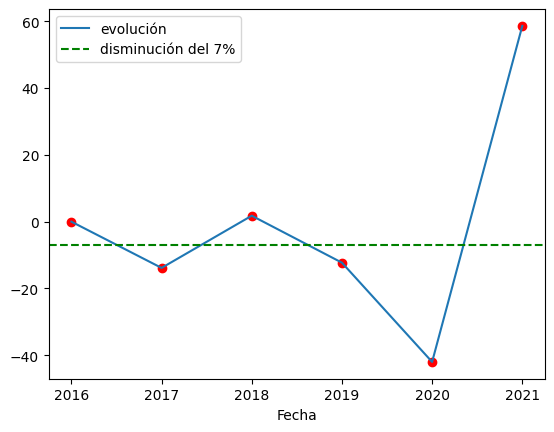

In [68]:

# Crear la gráfica de líneas
ax = kpi2[['evolución']].plot()


# Poner puntos en las ubicaciones de los valores
ax.scatter(x=kpi2.index, y=kpi2['evolución'], color='red', marker='o')
#ax.scatter(x=range(len(kpi1)), y=kpi1['meta'], color='blue', label='meta', marker='o')
ax.axhline(y=-7, color='green', linestyle='--', label='disminución del 7%')
# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

# KPI 3

Aquí se plantea reducir el procentaje de muertes por siniestros viales para las personas en un rango de edad de 18 a 35 años en un 10% por año,  ya que representa el grupo con mayor presencia en los registros.

In [71]:
kpi3=dfhomicidios[(dfhomicidios.Edad>18)&(dfhomicidios.Edad<=35)].groupby(dfhomicidios.Fecha.dt.year)['No_víctimas'].count().reset_index()
kpi3['victimas año anterior']=kpi3['No_víctimas'].shift(1)
kpi3.fillna(0,inplace=True)
kpi3['evolución']=((kpi3['victimas año anterior']-kpi3['No_víctimas'])/kpi3['victimas año anterior']*100)*-1
kpi3.loc[0,'evolución']=0
kpi3.to_csv('Datasets/kpi3.csv',index=False)
kpi3

,Fecha,No_víctimas,victimas año anterior,evolución
0,2016,62,0.0,0.000000
1,2017,58,62.0,-6.451613
2,2018,65,58.0,12.068966
3,2019,42,65.0,-35.384615
4,2020,22,42.0,-47.619048
5,2021,35,22.0,59.090909


In [72]:
kpi3.set_index(['Fecha'],inplace=True)

### Para la siguiente gráfica tenemos la diferencia en porcentajes que hubo año contra año anterior, donde para los años 2019 fue cuando se cumplió este objetivo, si embargo esto esta ampliamente relacioado con la pandemia del COVID 19 donde hubo un aislamiento a nivel mundial y se redujo drasticamente la cantidad de personas que salían de sus casa por un largo tiempo.

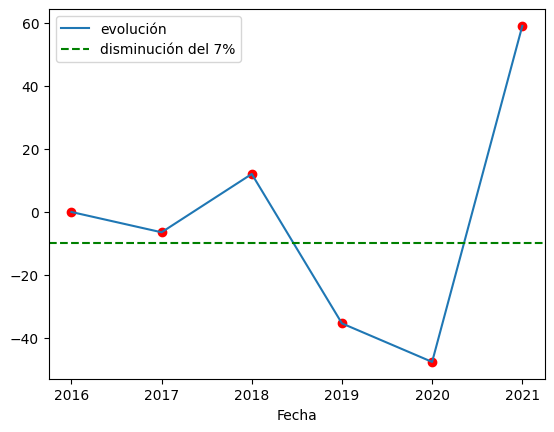

In [73]:

# Crear la gráfica de líneas
ax = kpi3[['evolución']].plot()


# Poner puntos en las ubicaciones de los valores
ax.scatter(x=kpi3.index, y=kpi3['evolución'], color='red', marker='o')
#tenemos una linea donde indica la meta para tenerla presente
ax.axhline(y=-10, color='green', linestyle='--', label='disminución del 7%')
# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()